In [46]:
########################## EDA
import os 
import time
from sklearn import pipeline 
import pandas as pd
from sklearn.compose import ColumnTransformer
import string
import seaborn as sb
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import numpy as np
import re
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
from sklearn.preprocessing import LabelEncoder

########################## Preprocessing
import spacy
import time
from tqdm import tqdm_notebook as tqdm
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from pandas.io.formats.style import Styler
########################## Machine Learning
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes  import MultinomialNB
from sklearn.naive_bayes  import BernoulliNB
from sklearn.ensemble     import RandomForestClassifier
from xgboost              import XGBClassifier

########################## Machine Learning Evaluation
from sklearn.metrics         import accuracy_score, f1_score,confusion_matrix
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.experimental  import enable_hist_gradient_boosting # Necesary for HistGradientBoostingClassifier
from sklearn.ensemble      import HistGradientBoostingClassifier
from xgboost               import XGBClassifier
from lightgbm              import LGBMClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn import metrics   


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
import os
os.environ["KAGGLE_CONFIG_DIR"] = ("/content")

In [3]:
#to load data 
!kaggle datasets download -d praveengovi/emotions-dataset-for-nlp

emotions-dataset-for-nlp.zip: Skipping, found more recently modified local copy (use --force to force download)


In [5]:
#unzip the dataset
!unzip "/content/emotions-dataset-for-nlp.zip" -d "/content"

Archive:  /content/emotions-dataset-for-nlp.zip
  inflating: /content/test.txt       
  inflating: /content/train.txt      
  inflating: /content/val.txt        


In [117]:
#to get CSV formats  text - train and validation 
df = pd.read_csv("/content/test.txt",delimiter=';',index_col=0,header=None, names=['Statement', 'Feeling'])
df.to_csv('/content/test.csv')

In [118]:
df_test = pd.read_csv('/content/test.csv')
df_test.head()

,Statement,Feeling
0,im feeling rather rotten so im not very ambitious right now,sadness
1,im updating my blog because i feel shitty,sadness
2,i never make her separate from me because i don t ever want her to feel like i m ashamed with her,sadness
3,i left with my bouquet of red and yellow tulips under my arm feeling slightly more optimistic than when i arrived,joy
4,i was feeling a little vain when i did this one,sadness


In [119]:
df = pd.read_csv("/content/val.txt",delimiter=';',index_col=0,header=None, names=['Statement', 'Feeling'])
df.to_csv('/content/val.csv')

In [120]:
df_val= pd.read_csv('/content/val.csv')
df_val.head()

,Statement,Feeling
0,im feeling quite sad and sorry for myself but ill snap out of it soon,sadness
1,i feel like i am still looking at a blank canvas blank pieces of paper,sadness
2,i feel like a faithful servant,love
3,i am just feeling cranky and blue,anger
4,i can have for a treat or if i am feeling festive,joy


In [121]:
df = pd.read_csv("/content/train.txt",delimiter=';',index_col=0,header=None, names=['Statement', 'Feeling'])
df.to_csv('/content/train.csv')

In [122]:
df_train = pd.read_csv('/content/train.csv')
df_train.head()

,Statement,Feeling
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplace i will know that it is still on the property,love
4,i am feeling grouchy,anger


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


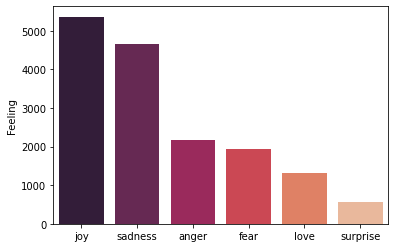

In [57]:
sb.barplot(df_train['Feeling'].value_counts().index,df_train['Feeling'].value_counts(),palette='rocket')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


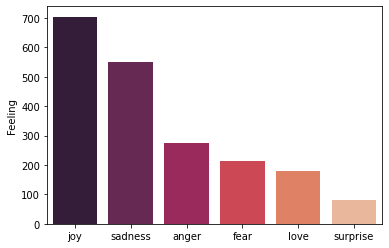

In [58]:
sb.barplot(df_val['Feeling'].value_counts().index,df_val['Feeling'].value_counts(),palette='rocket')

In [123]:
def clean_text(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', str(text))
    text = re.sub('<.*?>+', '', str(text))
    text = re.sub('[%s]' % re.escape(string.punctuation), '', str(text))
    text = re.sub('\n', '', str(text))
    text = re.sub('\w*\d\w*', '', str(text))
    return text

# Applying the cleaning function to both test and training datasets
df_train['Statement'] = df_train['Statement'].apply(lambda x: clean_text(x))
df_test['Statement'] = df_test['Statement'].apply(lambda x: clean_text(x))
df_val['Statement'] = df_val['Statement'].apply(lambda x: clean_text(x))
# Let's take a look at the updated text
df_train['Statement'].head()

0                                                                                         i didnt feel humiliated
1    i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake
2                                                                im grabbing a minute to post i feel greedy wrong
3                    i am ever feeling nostalgic about the fireplace i will know that it is still on the property
4                                                                                            i am feeling grouchy
Name: Statement, dtype: object

In [124]:
tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')
df_train['Statement'] = df_train['Statement'].apply(lambda x: tokenizer.tokenize(x))
df_test['Statement'] = df_test['Statement'].apply(lambda x: tokenizer.tokenize(x))
df_val['Statement'] = df_val['Statement'].apply(lambda x: tokenizer.tokenize(x))
df_train['Statement'].head()

0                                                                                                          [i, didnt, feel, humiliated]
1    [i, can, go, from, feeling, so, hopeless, to, so, damned, hopeful, just, from, being, around, someone, who, cares, and, is, awake]
2                                                                           [im, grabbing, a, minute, to, post, i, feel, greedy, wrong]
3                       [i, am, ever, feeling, nostalgic, about, the, fireplace, i, will, know, that, it, is, still, on, the, property]
4                                                                                                             [i, am, feeling, grouchy]
Name: Statement, dtype: object

In [125]:
def remove_stopwords(text):
    """
    Removing stopwords belonging to english language
    
    """
    words = [w for w in text if w not in stopwords.words('english')]
    return words


df_train['Statement'] = df_train['Statement'].apply(lambda x : remove_stopwords(x))
df_test['Statement'] = df_test['Statement'].apply(lambda x : remove_stopwords(x))
df_val['Statement'] = df_val['Statement'].apply(lambda x : remove_stopwords(x))
df_train.head()

,Statement,Feeling
0,"[didnt, feel, humiliated]",sadness
1,"[go, feeling, hopeless, damned, hopeful, around, someone, cares, awake]",sadness
2,"[im, grabbing, minute, post, feel, greedy, wrong]",anger
3,"[ever, feeling, nostalgic, fireplace, know, still, property]",love
4,"[feeling, grouchy]",anger


In [126]:
def combine_text(list_of_text):
    '''Takes a list of text and combines them into one large chunk of text.'''
    combined_text = ' '.join(list_of_text)
    return combined_text

df_train['Statement'] = df_train['Statement'].apply(lambda x : combine_text(x))
df_test['Statement'] = df_test['Statement'].apply(lambda x : combine_text(x))
df_val['Statement'] = df_val['Statement'].apply(lambda x : combine_text(x))
df_train.head()

,Statement,Feeling
0,didnt feel humiliated,sadness
1,go feeling hopeless damned hopeful around someone cares awake,sadness
2,im grabbing minute post feel greedy wrong,anger
3,ever feeling nostalgic fireplace know still property,love
4,feeling grouchy,anger


In [65]:
tfidf = TfidfVectorizer(min_df=2, max_df=0.5, ngram_range=(1, 2))
train_tfidf = tfidf.fit_transform(df_train['Statement'])
val_tfidf = tfidf.fit_transform(df_val['Statement'])
test_tfidf = tfidf.transform(df_test['Statement'])

In [127]:
df_data = pd.concat([df_train, df_test,df_val])

In [128]:
tfidf = TfidfVectorizer(min_df=2, max_df=0.5, ngram_range=(1, 2))
data_tfidf = tfidf.fit_transform(df_data['Statement'])

In [129]:
X_train, X_test, y_train, y_test = train_test_split(data_tfidf,df_data['Feeling'], test_size=0.30, random_state=5)

In [131]:
X_train

<14000x21273 sparse matrix of type '<class 'numpy.float64'>'
	with 155275 stored elements in Compressed Sparse Row format>

In [132]:
categorical_cols = ['Feeling']

In [133]:
categorical_transformer = Pipeline(steps=[
('encoder', LabelEncoder())
])

In [134]:
preprocessor = ColumnTransformer(
transformers=[
('cat', categorical_transformer, categorical_cols)
],remainder='drop')

In [ ]:
df_train

In [137]:
mult_classifiers={
    "Logistic": LogisticRegression(),
    "KNN":KNeighborsClassifier(n_neighbors=3),
    "MLP":MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1)
    }

mult_classifiers = {name:pipeline.make_pipeline(preprocessor, model) for name, model in mult_classifiers.items()}

In [87]:
'''X_train, y_train = df_train.iloc[:,0],df_train.iloc[:,1]
X_val,y_val = df_val.iloc[:,0],df_val.iloc[:,1]
X_test,y_test = df_test.iloc[:,0],df_test.iloc[:,1]'''

In [138]:



results = pd.DataFrame({'Model': [], 'Accuracy': [], 'Bal Acc.': [], 'Time': []})

for model_name, model in mult_classifiers.items():
    start_time = time.time()
    
    # FOR EVERY PIPELINE (PREPRO + MODEL) -> TRAIN WITH TRAIN DATA (x_train)
    model.fit(X_train,y_train)
    # GET PREDICTIONS USING x_val
    pred = model.predict(X_test)

    total_time = time.time() - start_time

    results = results.append({"Model":    model_name,
                              "Accuracy": metrics.accuracy_score(y_val, pred)*100,
                              "Bal Acc.": metrics.balanced_accuracy_score(y_val, pred)*100,
                              "Time":     total_time},
                              ignore_index=True)
                              
                              





results_ord = results.sort_values(by=['Accuracy'], ascending=False, ignore_index=True)
results_ord.index += 1 
results_ord.style.bar(subset=['Accuracy', 'Bal Acc.'], vmin=0, vmax=100, color='#5fba7d')

ValueError: ignored

In [ ]:
df_train

In [49]:
y_train.shape

(16000,)

In [73]:
from sklearn.naive_bayes import CategoricalNB
clf = CategoricalNB()
y_predc = clf.fit(X_train, y_train).predict(X_val)
y_predc

ValueError: ignored

In [85]:
le = LabelEncoder()
df_train['Feeling'] = le.fit_transform(df_train['Feeling'])

In [139]:
mnb = MultinomialNB()
mnb.fit(X_train, y_train)
predicted = mnb.predict(X_test)

In [140]:
acc_score = metrics.accuracy_score(predicted,y_test)
prec_score = metrics.precision_score(y_test,predicted, average='macro')
recall = metrics.recall_score(y_test, predicted,average='macro')
f1 = metrics.f1_score(y_test,predicted,average='macro')
matrix = metrics.confusion_matrix(y_test,predicted)

In [115]:
matrix

array([[ 115,    0,  426,    0,  258,    0],
       [   7,   76,  396,    0,  222,    0],
       [   0,    0, 2001,    0,   31,    0],
       [   0,    0,  421,    9,   59,    0],
       [   0,    1,  250,    0, 1503,    0],
       [   0,    5,  163,    0,   57,    0]])

In [141]:
acc_score

0.7105

In [143]:
LR = LogisticRegression()
LR.fit(X_train,y_train)
predictedd = LR.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [144]:
acc_score = metrics.accuracy_score(predictedd,y_test)
prec_score = metrics.precision_score(y_test,predictedd, average='macro')
recall = metrics.recall_score(y_test, predictedd,average='macro')
f1 = metrics.f1_score(y_test,predictedd,average='macro')
matrix = metrics.confusion_matrix(y_test,predictedd)

In [145]:
acc_score

0.857

In [146]:
prec_score

0.8856749749341422

In [147]:
matrix

array([[ 612,    7,   92,    3,   85,    0],
       [  32,  515,   92,    0,   55,    7],
       [   4,    4, 1982,   23,   17,    2],
       [   6,    0,  196,  263,   24,    0],
       [  15,    9,   49,    0, 1681,    0],
       [   0,   43,   66,    0,   27,   89]])